## Geha+25, Figure 3:  Sky Flexure residuals

In [1]:
import numpy as np
import os

from myplotstyle import plt,get_figsize
import matplotlib.backends.backend_pdf

from astropy.table import Table
from astropy.io import ascii,fits
import glob

from dmost.core import dmost_utils,dmost_flexure

import scipy.ndimage as scipynd
from scipy.optimize import curve_fit

DEIMOS_RAW   = os.getenv('DEIMOS_RAW')
DEIMOS_REDUX = os.getenv('DEIMOS_REDUX')


In [2]:
mask = 'f642_2'
nexp = 0
data_dir = DEIMOS_REDUX+mask


spec1d_files = glob.glob(data_dir+'/Science/spec1d*fits')
hdu          = fits.open(spec1d_files[nexp])
dmost_file   = glob.glob(data_dir+'/dmost/dmost*')

In [3]:
slits, mask = dmost_utils.read_dmost(dmost_file[0])

In [4]:
# READ SKY LINES -- THESE ARE VACUUM WAVELENGTHS
sky_file = DEIMOS_RAW+'Other_data/sky_single_mg.dat'
sky=ascii.read(sky_file)


In [5]:
m= np.argwhere((slits['RA'] > 119.68) & (slits['DEC'] > 26.35))
arg1=m[1][0]


m = np.argwhere((slits['RA'] > 119.58)& (slits['RA']< 119.59))
arg2=m[0][0]

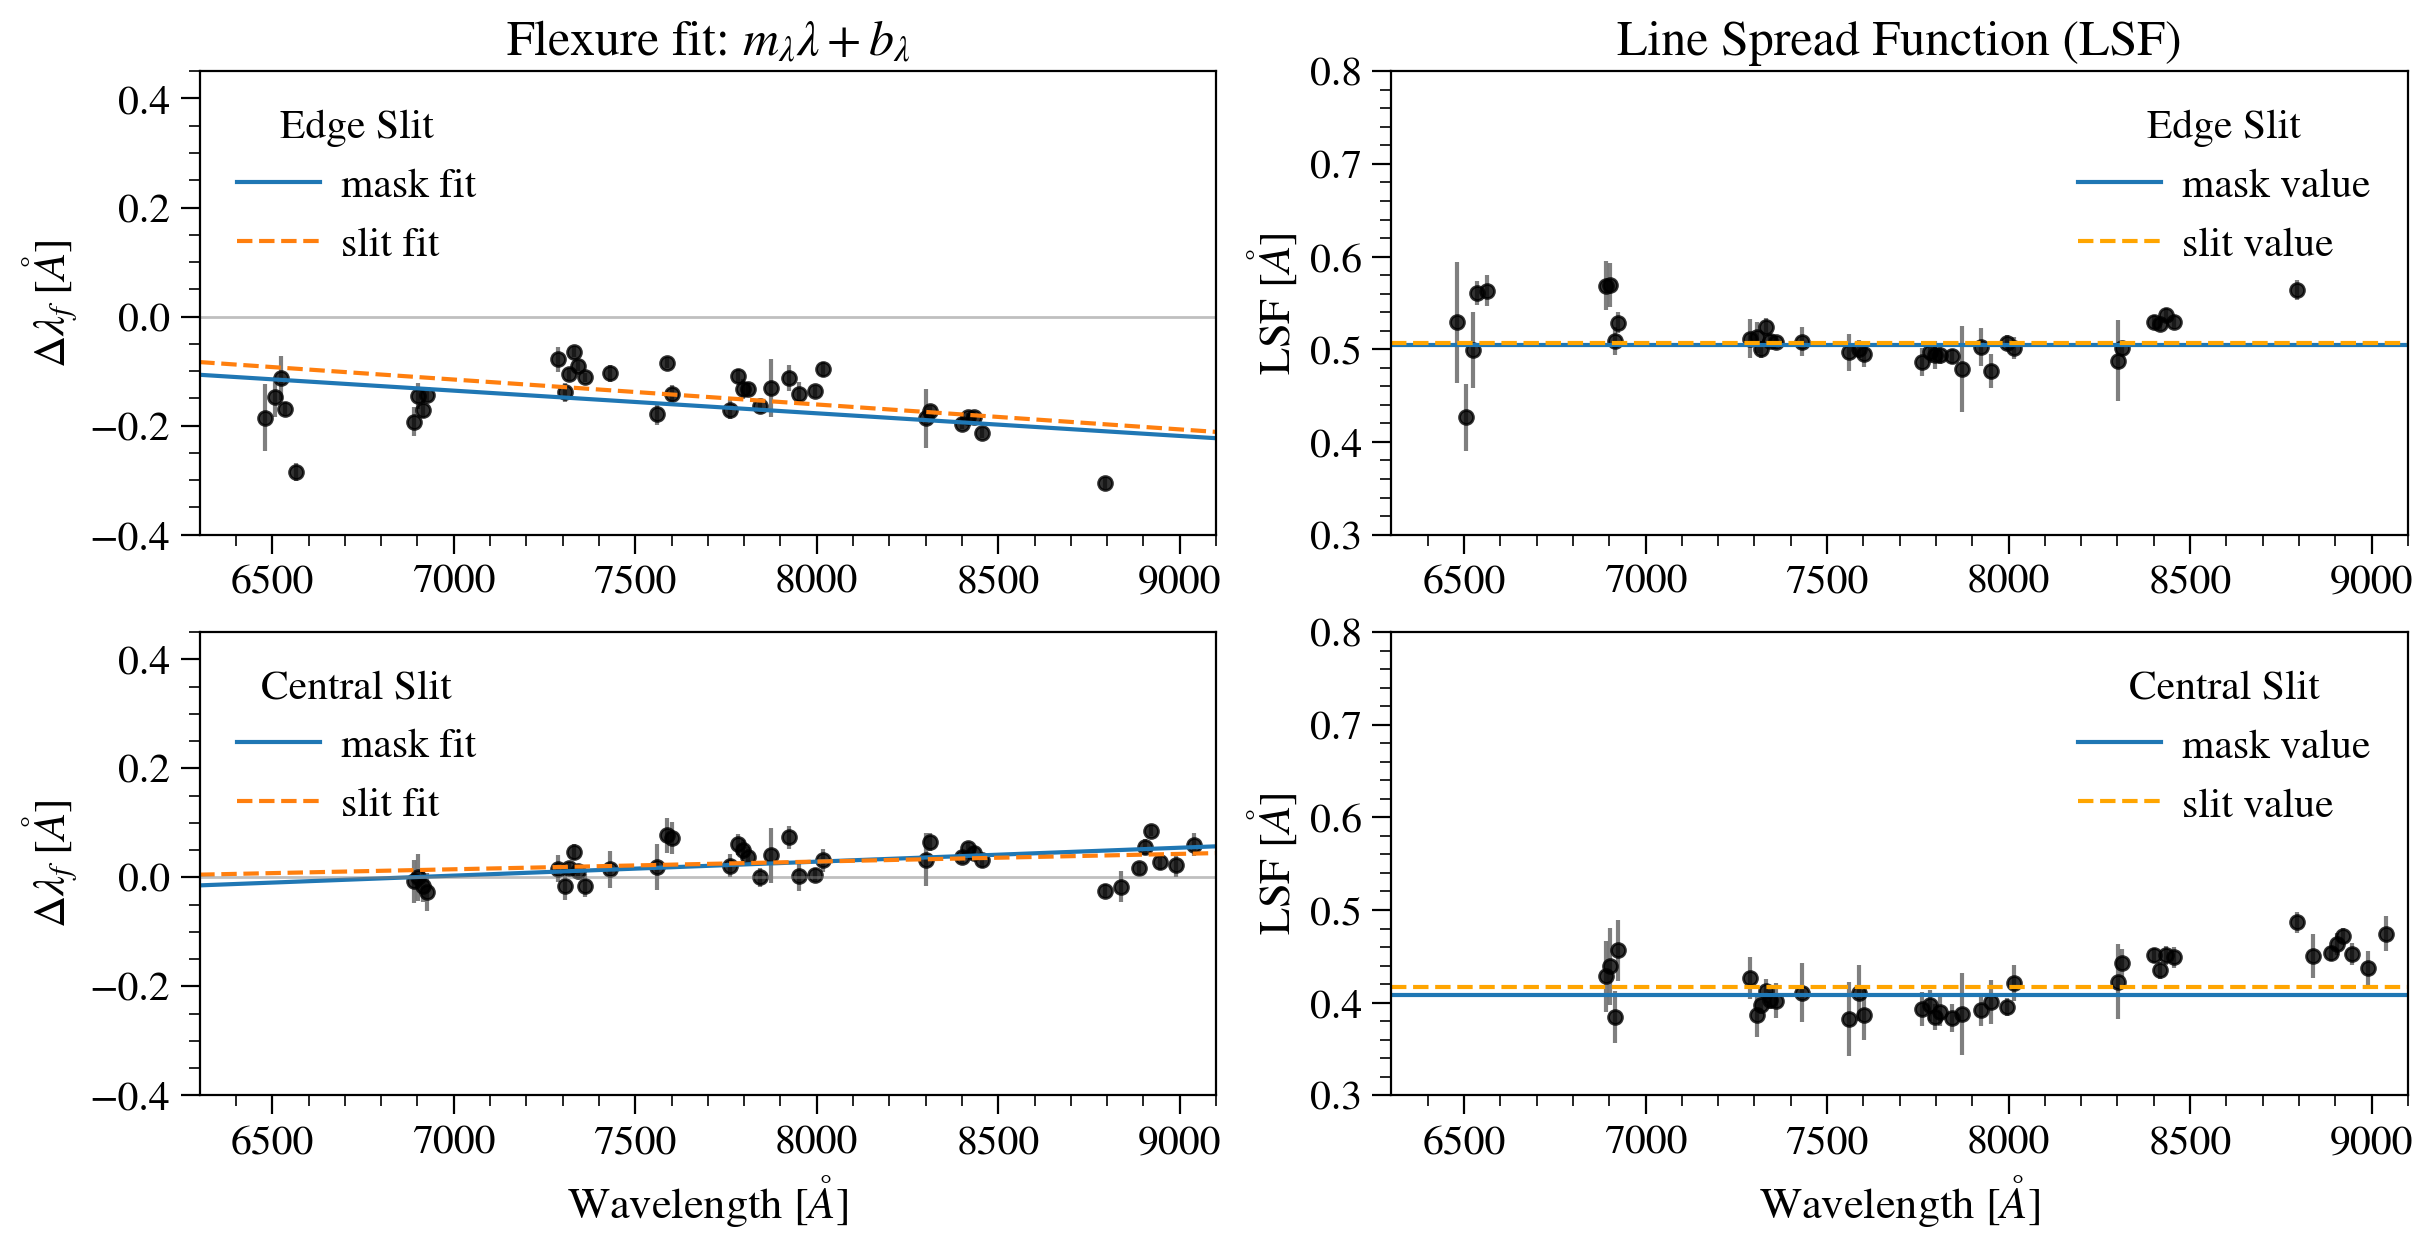

In [6]:
pdf = matplotlib.backends.backend_pdf.PdfPages('/Users/mg37/Desktop/figure_skylines.pdf')
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2, figsize=get_figsize(wide=True, ratio=2.))



arg = arg1
pn = slits['slitname'][arg,nexp]
sky_lines, sky_diff,sky_ediff,sky_los,sky_elos = dmost_flexure.sky_em_residuals(hdu[pn].data['OPT_WAVE'], \
                                        hdu[pn].data['OPT_COUNTS_SKY'],\
                                        hdu[pn].data['OPT_COUNTS_IVAR'],sky)

ax1.plot(sky_lines,sky_diff,'ko',alpha=0.8,label='__no_label__')
ax1.errorbar(sky_lines,sky_diff,yerr=sky_ediff,fmt='none',ecolor='k',alpha=0.5)
ax1.set_ylim(-0.4,0.45)

fitted_line = dmost_flexure.fit_sky_linear(sky_lines,sky_diff,sky_ediff)

xx = np.arange(6000,9200,1)
l1 = slits['fit_slope'][arg,nexp]*xx + slits['fit_b'][arg,nexp]

l2 = fitted_line[1]*xx + fitted_line[0]
ax1.plot(xx,l1,'-',label='mask fit')
ax1.plot(xx,l2,'--',label='slit fit')
ax1.axhline(linewidth=1, color='grey',alpha=0.5)
ax1.set_ylabel(r'$\Delta \lambda_f~[\AA]$')
ax1.set_xlim(6300,9100)
ax1.legend(title='Edge Slit',loc=2)
   
ax1.set_title('Flexure fit: $m_{\lambda}\lambda + b_{\lambda}$')
####################
ax2.plot(sky_lines,sky_los,'ko',alpha=0.8,label='__no_label__')
ax2.errorbar(sky_lines,sky_los,yerr=sky_elos,fmt='none',ecolor='k',alpha=0.5)
ax2.axhline(slits['fit_lsf'][arg,nexp] ,ls='-',label='mask value')
ax2.axhline(np.median(sky_los),ls='--',c='orange',label='slit value')
ax2.legend(fontsize=12)

ax2.set_title('Line Spread Function (LSF)')
ax2.set_ylim(0.3,0.8)
ax2.set_xlim(6300,9100)


ax2.set_ylabel('LSF [$\AA$]')
ax2.legend(loc=1,title='Edge Slit')


##############################################################################

arg = arg2
pn  = slits['slitname'][arg,nexp]
sky_lines, sky_diff,sky_ediff,sky_los,sky_elos = dmost_flexure.sky_em_residuals(hdu[pn].data['OPT_WAVE'], \
                                        hdu[pn].data['OPT_COUNTS_SKY'],\
                                        hdu[pn].data['OPT_COUNTS_IVAR'],sky)
ax3.plot(sky_lines,sky_diff,'ko',alpha=0.8,label='__no_label__')
ax3.errorbar(sky_lines,sky_diff,yerr=sky_ediff,fmt='none',ecolor='k',alpha=0.5)
ax3.set_ylim(-0.4,0.45)

fitted_line = dmost_flexure.fit_sky_linear(sky_lines,sky_diff,sky_ediff)

xx=np.arange(6000,9200,1)
l1 = slits['fit_slope'][arg,nexp]*xx + slits['fit_b'][arg,nexp]

l2 = fitted_line[1]*xx + fitted_line[0]
ax3.plot(xx,l1,'-',label='mask fit')
ax3.plot(xx,l2,'--',label='slit fit')
ax3.axhline(linewidth=1, color='grey',alpha=0.5)
ax3.set_ylabel('$\Delta \lambda_f~[\AA]$')
ax3.set_xlabel('Wavelength [$\AA$]')

ax3.set_xlim(6300,9100)
ax3.legend(title='Central Slit',loc=2)
   

####################
ax4.plot(sky_lines,sky_los,'ko',alpha=0.8,label='__no_label__')
ax4.errorbar(sky_lines,sky_los,yerr=sky_elos,fmt='none',ecolor='k',alpha=0.5)
ax4.axhline(slits['fit_lsf'][arg,nexp] ,ls='-',label='mask value')
ax4.axhline(np.median(sky_los),ls='--',c='orange',label='slit value')
ax4.legend(fontsize=12)

ax4.set_ylim(0.3,0.8)
ax4.set_xlim(6300,9100)


ax4.set_xlabel('Wavelength [$\AA$]')
ax4.set_ylabel('LSF [$\AA$]')
ax4.legend(loc=1,title='Central Slit')

pdf.savefig()
pdf.close()